## *Librerias*

In [4]:
import pandas as pd
import numpy as np
import streamlit as st
import random

## __Generador de palabras, data sintetica, y API GPT__

In [88]:

# Aquí van los nombres, temas y emociones que se usarán para generar los tweets
nombres = ['Nombre1', 'Nombre2', 'Nombre3']
temas = ['Tema1', 'Tema2', 'Tema3']
emociones = ['feliz', 'triste', 'enojado']

def genera_tweet(nombre, tema, emocion):
    frases_inicio = [
        f"{nombre} está {emocion} porque",
        f"A {nombre} le parece {emocion} que",
        f"{nombre}, sintiéndose {emocion}, dice que"
    ]

    frases_medio = [
        f"el {tema} es realmente emocionante",
        f"el {tema} es muy frustrante",
        f"el {tema} es muy aburrido",
    ]

    frases_final = [
        "no puede esperar a ver qué sucede a continuación.",
        "se siente muy decepcionado.",
        "tiene muchas esperanzas para el futuro."
    ]

    tweet = random.choice(frases_inicio) + ' ' + random.choice(frases_medio) + ', ' + random.choice(frases_final)
    return tweet

# Generar 3 tweets
for i in range(3):
    print(genera_tweet(random.choice(nombres), random.choice(temas), random.choice(emociones)))


Nombre1, sintiéndose feliz, dice que el Tema1 es muy aburrido, tiene muchas esperanzas para el futuro.
Nombre2 está triste porque el Tema1 es muy aburrido, no puede esperar a ver qué sucede a continuación.
Nombre2 está triste porque el Tema2 es muy frustrante, tiene muchas esperanzas para el futuro.


In [ ]:

assert "openai" in openai_secret_manager.get_services()
secrets = openai_secret_manager.get_secret("openai")

import openai
openai.api_key = secrets["api_key"]

def generate_tweet(name: str, topic: str, prompt: str):
    response = openai.Completion.create(
        engine="davinci",
        prompt=f"Generate a tweet for {name} about {topic}. {prompt}",
        temperature=0.7,
        max_tokens=280,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response['choices'][0]['text']

# Example usage
name = "John Doe"
topic = "Climate Change"
prompt = "John is passionate about reducing carbon emissions."
tweet = generate_tweet(name, topic, prompt)
print(tweet)

### PROGRAMA SEPARADOS Y FABRICADOR DE CSVs

In [102]:
import csv

# Definir el texto
texto = ''' Carlos Hernandez, Qué emoción al ver cómo la tecnología 5G revoluciona la forma en que interactuamos con el mundo. ¡El futuro es ahora! #
Carlos Hernandez, Los algoritmos de recomendación de algunos servicios de streaming podrían mejorar mucho. ¡Es como si no me conocieran! #
Carlos Hernandez, Actualizando mi PC. Nada más emocionante que darle un poco de vida nueva a una vieja máquina. #
Carlos Hernandez, La obsolescencia programada es una práctica que debe terminarse. Todos deberíamos poder usar nuestros dispositivos por más tiempo. #
Carlos Hernandez, Aprendiendo más sobre inteligencia artificial. Impresionante cómo las máquinas pueden aprender y adaptarse. #
Carlos Hernandez, A veces es desalentador ver cuánta desinformación hay sobre la ciberseguridad. #
Carlos Hernandez, La realidad virtual no deja de asombrarme. Las posibilidades son infinitas. #
Carlos Hernandez, Es triste ver cómo algunas compañías de tecnología no toman en serio la privacidad del usuario. #
Carlos Hernandez, Probando el nuevo smartphone. A ver si cumple con las expectativas. #
Carlos Hernandez, Agotado de constantes actualizaciones de software que parecen más bugs que mejoras. #
Carlos Hernandez, La tecnología LED está cambiando el juego en la iluminación. ¡Adiós a las bombillas incandescentes! #
Carlos Hernandez, Pensando en la cantidad de cables que hay en mi escritorio. ¿Alguien más sueña con un mundo completamente inalámbrico? #
Carlos Hernandez, La internet de las cosas promete, pero necesitamos estándares de seguridad más fuertes. #
Carlos Hernandez, Frustrado con la velocidad de internet. ¿Es demasiado pedir un día sin problemas de conexión? #
Carlos Hernandez, Descubriendo las maravillas de la carga rápida. Ahora si se puede decir "en un abrir y cerrar de ojos". #
Carlos Hernandez, Realmente molesto con la falta de transparencia en cuanto a la recopilación de datos. #
Carlos Hernandez, Creando mi primera aplicación. Es un desafío, pero estoy emocionado. #
Carlos Hernandez, Extrañando los días en que los teléfonos venían con auriculares incluidos. #
Carlos Hernandez, Aprendiendo sobre tecnologías verdes. Es hora de hacer más sostenible nuestro mundo. #
Carlos Hernandez, Desearía que los desarrolladores consideraran más a los usuarios finales al diseñar sus productos. #
Carlos Hernandez, Aprecio la belleza del código abierto. Creando juntos, avanzamos más rápido. #
Carlos Hernandez, Lamentable que el ciberacoso sea aún un problema tan prevalente. Necesitamos más herramientas para combatirlo. #
Carlos Hernandez, Recordando los viejos tiempos con los disquetes. ¡Cómo ha avanzado el almacenamiento de datos! #
Carlos Hernandez, Días en los que te das cuenta de que la inteligencia artificial todavía tiene mucho que aprender. #
Carlos Hernandez, Leyendo sobre blockchain. Realmente es una revolución en el mundo digital. #
Carlos Hernandez, Nada más frustrante que una pantalla táctil que no responde. #'
'''
# Dividir el texto en oraciones
oraciones = texto.split('#')

# Dividir el texto en oraciones
oraciones = texto.split('#')

# Crear el archivo csv y escribir cada oración en una nueva línea
with open('mi_archivo.csv', 'w', newline='' ,encoding='utf-8') as archivo:
    escritor = csv.writer(archivo)
    for oracion in oraciones:
        # Removemos los espacios en blanco antes y después de la oración y solo escribimos si hay texto.
        oracion = oracion.strip()
        if oracion:
            escritor.writerow([oracion])

# Leer el contenido del archivo csv y reemplazar las comillas
with open('mi_archivo.csv', 'r', encoding='utf-8') as archivo:
    contenido = archivo.read()

# Eliminar las comillas
contenido = contenido.replace('"', '')

# Sobrescribir el archivo csv con el contenido sin comillas
with open('mi_archivo.csv', 'w', encoding='utf-8') as archivo:
    archivo.write(contenido)

print('El archivo CSV ha sido creado exitosamente.')





El archivo CSV ha sido creado exitosamente.


# Modelo de clasificacion de emociones

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import openai_secret_manager
from sklearn.metrics import accuracy_score

In [122]:
skiprows = [14, 18, 22]  # Lista de números de línea a omitir

In [ ]:
df = pd.read_csv('xxx', skiprows=skiprows)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['texto'], data['emocion'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

In [ ]:
y_pred = classifier.predict(X_test_vectors)

## Prueba del modelo 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# MODELO QUE DEFINA EL TEMA DE LA CUENTA

In [179]:
import pandas as pd
import spacy
import langid
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Instalar e importar las palabras de detención para varios idiomas
nltk.download('stopwords')

stop_words = {
    'en': set(stopwords.words('english')),
    'es': set(stopwords.words('spanish')),
    'fr': set(stopwords.words('french')),
    'it': set(stopwords.words('italian')),
    'de': set(stopwords.words('german'))
}

# Leer el archivo csv
data = pd.read_csv('csv\carlos_hernandez_tweets.csv')

# Inicializar Spacy
nlp = spacy.load('en_core_web_sm')

def process_tweet(tweet):
    # Preprocesamiento con Spacy
    doc = nlp(tweet.lower())
    
    # Detectar el idioma del tweet
    lang = langid.classify(tweet)[0]

    # Tokenización
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_ not in stop_words.get(lang, set())]

    return tokens

# Procesar todos los tweets
data['processed_tweets'] = data['tweet'].apply(process_tweet)

# Crear un diccionario con Gensim
dictionary = Dictionary(data['processed_tweets'])

# Crear una representación de bolsa de palabras (BoW)
corpus = [dictionary.doc2bow(tweet) for tweet in data['processed_tweets']]

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, random_state=0)

# Obtener los nombres de los topics más importantes
topics = lda_model.print_topics(num_topics=5, num_words=10)

# Filtrar las palabras de apoyo y obtener la lista de temas sin esas palabras
topic_list = []
for topic in topics:
    words = topic[1].split('*')[-1].strip().replace('"', '').split()
    filtered_words = [word for word in words if len(word) > 2]
    if filtered_words:
        topic_list.append(filtered_words[0])

# Eliminar palabras no deseadas
topic_list = [topic for topic in topic_list if len(topic) > 2]

# Imprimir la lista de temas
print("Lista de topics:", topic_list[:5])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lista de topics: ['sueña', 'leyendo', 'ciberseguridad', 'ahora']


In [182]:
import pandas as pd
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Leer el archivo csv
data = pd.read_csv('csv\carlos_hernandez_tweets.csv')

# Inicializar Spacy
nlp = spacy.load('es_core_news_sm')

def process_tweet(tweet):
    # Preprocesamiento con Spacy
    doc = nlp(tweet.lower())
    
    # Tokenización
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return tokens

# Procesar todos los tweets
data['processed_tweets'] = data['tweet'].apply(process_tweet)

# Crear un diccionario con Gensim
dictionary = Dictionary(data['processed_tweets'])

# Crear una representación de bolsa de palabras (BoW)
corpus = [dictionary.doc2bow(tweet) for tweet in data['processed_tweets']]

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, random_state=0)

# Obtener los temas principales
topics = lda_model.print_topics(num_topics=5, num_words=10)

# Extraer los nombres de los temas
topic_list = []
for topic in topics:
    words = topic[1].split('*')[-1].strip().replace('"', '').split()
    filtered_words = [word for word in words if len(word) > 2]
    if filtered_words:
        topic_list.append(filtered_words[0])

# Imprimir la lista de temas
print("Lista de topics:", topic_list[:5])


Lista de topics: ['cantidad', 'hora', 'pedir', 'desear', 'obsolescencia']


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Descargar los datos necesarios de NLTK
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador y obtener las stop words del inglés
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def preprocess(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # Eliminar stop words y lematizar
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return text

# Aplicar el preprocesamiento al texto
data['text'] = data['text'].apply(preprocess)

# Continuar con el resto del código aquí...


# Deteccion de emociones

In [13]:
# Primero, importamos las librerías necesarias
import pandas as pd
from transformers import pipeline

# Cargamos el dataframe
df = pd.read_csv('csv\Ari_tweets.csv')

# Cargamos el modelo de detección de sentimientos
nlp = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-emotion')

# Aplicamos el modelo a cada tweet
df['emotion'] = df['tweet'].apply(lambda x: nlp(x)[0]['label'])

# Imprimimos los primeros registros para verificar
print(df.head())

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


  user                                              tweet   emotion
0  Ari  ¡A veces la productividad puede ser abrumadora...  optimism
1  Ari  ¡La procrastinación es uno de los peores enemi...       joy
2  Ari  "A veces la frustración es parte de la product...       joy
3  Ari  Sentirse desalentado y sin motivación es parte...     anger
4  Ari  A veces es difícil ser productivo cuando nos s...     anger


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import re
from transformers import pipeline
from deep_translator import GoogleTranslator

# Cargamos el dataframe
df = pd.read_csv('csv\Mati_tweets.csv')

# Función para limpiar el texto del tweet
def clean_text(text):
    # Eliminamos las menciones, los enlaces y los caracteres especiales
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Eliminamos las menciones
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text) # Eliminamos los enlaces
    text = re.sub(r'[^a-zA-Z0-9ñáéíóúüÁÉÍÓÚÜ\s]', '', text) # Eliminamos los caracteres especiales
    return text

# Función para traducir el texto al inglés y luego analizar la emoción
def detect_emotion(text):
    # Limpiamos el texto
    text_cleaned = clean_text(text)
    #si el texto no esta en español que haga esto
    if not langid.classify(text_cleaned)[0] == 'es':
        text_cleaned = GoogleTranslator(source='auto', target='spanish').translate(text_cleaned)
    else:
        text_cleaned = text_cleaned
    # Analizamos la emoción en el texto traducido
    emotion = nlp(text_cleaned)[0]['label']
    return emotion

# Cargamos el modelo de detección de emociones
nlp = pipeline('sentiment-analysis', model='finiteautomata/beto-emotion-analysis')

# Aplicamos la función a cada tweet
df['emotion'] = df['tweet'].apply(detect_emotion)

# Imprimimos los primeros registros para verificar
print(df.head())


In [12]:
df

,user,tweet,emotion
0,Mati,Sad news for those seeking joy: the search for...,sadness
1,Mati,"Devastating news of more job losses today, but...",sadness
2,Mati,"Sad news today, but we must keep a positive at...",anger
3,Mati,Sad news: another tragedy has hit the world to...,sadness
4,Mati,Sometimes it's hard to find inspiration when s...,sadness
5,Mati,Sometimes it can be hard to find motivation an...,anger
6,Mati,The path to inspiration can be long and windin...,anger
7,Mati,"Sometimes it feels like no matter what you do,...",sadness
8,Mati,Sometimes it can be hard to find the motivatio...,anger
9,Mati,Sometimes it feels like inspiration has abando...,sadness


In [14]:
from transformers import pipeline

def identificar_(dataframe):

    modelo = "jirmauritz/bert-multilingual-emoji"


    clasificador_emociones = pipeline("sentiment-analysis", model=modelo)
    emotions_list = []
    for texto in dataframe['tweet']:
        resultado = clasificador_emociones(texto)
        emotions = resultado[0]['label']
        emotions_list.append(emotions)
    dataframe['emotion'] = emotions_list
    return dataframe

In [12]:
def identificar_emociones(dataframe):

    if idioma == "Español" or "deutch" or "francés" or "english" or "italiano":
        modelo = "MilaNLProc/xlm-emo-t"

    clasificador_emotion = pipeline("sentiment-analysis", model=modelo)
    emociones = []
    for texto in dataframe['tweet']:
        resultado = clasificador_emotion(texto)
        etiqueta = resultado[0]['label']
        emociones.append(etiqueta)
    dataframe['sentimiento'] = emociones
    return dataframe

In [7]:
df = pd.read_csv('..\csv\Ari_tweets.csv')

In [42]:
df

,user,tweet,emotion
0,AlfaRomeo,"La vie est courte, profitez-en pour trouver de...",anger
1,AlfaRomeo,Même si les relations et les rencontres peuven...,anger
2,AlfaRomeo,"Lorsqu'on parle de relations et de rencontres,...",anger
3,AlfaRomeo,"La vie est courte, profitez de chaque moment a...",optimism
4,AlfaRomeo,Laissons les relations et les rencontres s'épa...,joy
...,...,...,...
95,AlfaRomeo,Être en paix avec soi-même est la base d'une r...,anger
96,AlfaRomeo,Les relations et les rencontres sont parfois d...,anger
97,AlfaRomeo,Que la paz soit au rendez-vous de vos relation...,optimism
98,AlfaRomeo,Même si la passion est apréciée dans les relat...,anger


In [3]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("dair-ai/emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/matia/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 603.53it/s]


In [4]:
train = pd.DataFrame(dataset['train'])

In [59]:
train

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [5]:
val = pd.DataFrame(dataset['validation'])

In [6]:
test = pd.DataFrame(dataset['test'])

# Task 3: Importing Data

bbb

Usando TensorFlow versión 2.12.0


No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/matia/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 375.95it/s]


{0, 1, 2, 3, 4, 5}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [===========

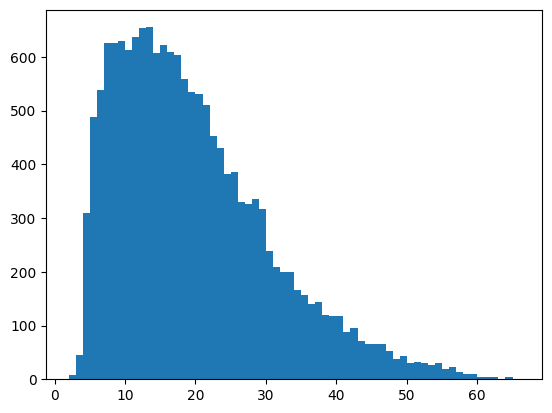

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs_trained), h.history['accuracy'], label='Training')
    plt.plot(range(epochs_trained), h.history['val_accuracy'], label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs_trained), h.history['loss'], label='Training')
    plt.plot(range(epochs_trained), h.history['val_loss'], label='Validation')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    # plt.show()  # Comentado para no mostrar la figura

def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(len(classes))), labels=classes)
    plt.yticks(list(range(len(classes))), labels=classes)
    plt.colorbar(ctx)
    # plt.show()  # Comentado para no mostrar la figura

print('Usando TensorFlow versión', tf.__version__)

from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

train = dataset['train']
val = dataset['validation']
test = dataset['test']

def get_tweet(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

tweets, labels = get_tweet(train)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded

padded_train_seq = get_sequences(tokenizer, tweets)

classes = set(labels)
print(classes)

class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

train_labels = names_to_ids(labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

h = model.fit(
    padded_train_seq,
    train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

# show_history(h)  # Comentado para no mostrar la figura

test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

_ = model.evaluate(test_seq, test_labels)

i = random.randint(0, len(test_labels) - 1)
print('Frase:', test_tweets[i])
print('Emoción:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Emoción Predicha:', pred_class)

preds = model.predict(test_seq)
classes_x = np.argmax(preds, axis=1)

# show_confusion_matrix(test_labels, classes_x, list(classes))  # Comentado para no mostrar la figura



In [81]:
from textblob import TextBlob

def traducir_a_ingles(texto):
    try:
        blob = TextBlob(texto)
        if blob.detect_language() != 'en':
            texto = blob.translate(to='en').string
    except Exception as e:
        print(f"No se pudo traducir el texto: {texto}. Error: {str(e)}")
    
    return texto

df['tweet'] = df['tweet'].apply(traducir_a_ingles)


No se pudo traducir el texto: ¡A veces la productividad puede ser abrumadora, pero no nos desanimemos! ¡Es importante recordar que todos los obstáculos tienen solucion. Error: HTTP Error 400: Bad Request
No se pudo traducir el texto: ¡La procrastinación es uno de los peores enemigos de la productividad! No dejes que tu desánimo te impida lograr tus metas. ¡Esfu. Error: HTTP Error 400: Bad Request
No se pudo traducir el texto: "A veces la frustración es parte de la productividad, pero hay que aprender a lidiar con ella para no dejarnos llevar por la negatividad".. Error: HTTP Error 400: Bad Request
No se pudo traducir el texto: Sentirse desalentado y sin motivación es parte de la vida, pero nunca pierdas de vista tu objetivo final y sigue trabajando para mejorar tu. Error: HTTP Error 400: Bad Request
No se pudo traducir el texto: A veces es difícil ser productivo cuando nos sentimos abrumados por los sentimientos negativos. Pero hay que seguir adelante para alcanzar nuestras. Error: HTT

In [75]:
df = pd.read_csv('..\csv\Ari_tweets.csv')

In [ ]:
traducir_a_ingles()

In [10]:
df = pd.read_csv('..\csv\Mati_tweets.csv')

In [16]:
# Supongamos que tienes un DataFrame llamado df con una columna llamada "tweet"
tweets = df['tweet'].tolist()

# Obtén las secuencias de los tweets utilizando el tokenizer
tweet_sequences = get_sequences(tokenizer, tweets)

# Realiza las predicciones de las emociones
predictions = model.predict(tweet_sequences)
predicted_labels = np.argmax(predictions, axis=1)

# Mapea los índices de las emociones predichas a las etiquetas correspondientes
predicted_emotions = [index_to_class[label] for label in predicted_labels]

# Agrega una nueva columna "emotion" al DataFrame con las emociones predichas
df['emotion'] = predicted_emotions

# Muestra el DataFrame con las emociones predichas
print(df[['tweet', 'emotion']])
  

1/1 [==============================] - 0s 36ms/step
                                                tweet  emotion
0   Sad news for those seeking joy: the search for...        0
1   Devastating news of more job losses today, but...        0
2   Sad news today, but we must keep a positive at...        0
3   Sad news: another tragedy has hit the world to...        3
4   Sometimes it's hard to find inspiration when s...        0
5   Sometimes it can be hard to find motivation an...        0
6   The path to inspiration can be long and windin...        3
7   Sometimes it feels like no matter what you do,...        0
8   Sometimes it can be hard to find the motivatio...        0
9   Sometimes it feels like inspiration has abando...        0
10  Sometimes it feels like inspiration is so far ...        1
11  Sometimes it's hard to find inspiration when f...        1
12  Sometimes it's hard to find inspiration when y...        0
13  Sometimes it's hard to find inspiration when y...        0
14 

In [28]:
df = pd.read_csv('..\csv\Ari_Tweets.csv')

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import re
from transformers import pipeline
from deep_translator import GoogleTranslator

# Cargamos el dataframe
df = pd.read_csv('csv\Mati_tweets.csv')

# Función para limpiar el texto del tweet
def clean_text(text):
    # Eliminamos las menciones, los enlaces y los caracteres especiales
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Eliminamos las menciones
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text) # Eliminamos los enlaces
    text = re.sub(r'[^a-zA-Z0-9ñáéíóúüÁÉÍÓÚÜ\s]', '', text) # Eliminamos los caracteres especiales
    return text

# Función para traducir el texto al inglés y luego analizar la emoción
def detect_emotion(text):
    # Limpiamos el texto
    text_cleaned = clean_text(text)
    #si el texto no esta en español que haga esto
    if not langid.classify(text_cleaned)[0] == 'en':
        text_cleaned = GoogleTranslator(source='auto', target='english').translate(text_cleaned)
    else:
        text_cleaned = text_cleaned
    # Analizamos la emoción en el texto traducido
    emotion = nlp(text_cleaned)[0]['label']
    return emotion

# Cargamos el modelo de detección de emociones
nlp = pipeline('sentiment-analysis', model='finiteautomata/beto-emotion-analysis')

# Aplicamos la función a cada tweet
df['emotion'] = df['tweet'].apply(detect_emotion)

# Imprimimos los primeros registros para verificar
print(df.head())


In [30]:
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import pandas as pd

nltk.download('averaged_perception_tagger')

def identificar_tema_principal(dataframe, idioma):
    # Obtener todos los tweets en una lista
    tweets = dataframe['tweet'].tolist()

    # Seleccionar stopwords según el idioma
    if idioma == "alemán":
        stop_words = set(stopwords.words('german'))
    elif idioma == "español":
        stop_words = set(stopwords.words('spanish'))
    elif idioma == "francés":
        stop_words = set(stopwords.words('french'))
    elif idioma == "inglés":
        stop_words = set(stopwords.words('english'))
    elif idioma == "italiano":
        stop_words = set(stopwords.words('italian'))
    else:
        raise ValueError("Idioma no soportado")

    # Tokenización de palabras y eliminación de stopwords
    palabras = [word for tweet in tweets for word in word_tokenize(tweet.lower()) if word.isalpha() and word not in stop_words]

    # Etiquetado de partes del discurso
    tagged_words = pos_tag(palabras)

    # Contar la frecuencia de cada palabra
    frecuencia_palabras = Counter(tagged_words)

    # Ordenar las palabras por frecuencia
    palabras_ordenadas = sorted(frecuencia_palabras.items(), key=lambda x: x[1], reverse=True)

    # Obtener el tema principal como la palabra más frecuente con etiqueta de sustantivo
    tema_principal = None
    for palabra, frecuencia in palabras_ordenadas:
        if 'NN' in palabra[1]:  # Verificar si la palabra tiene etiqueta de sustantivo
            tema_principal = palabra[0]
            break

    return tema_principal


[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index


In [32]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [33]:
identificar_tema_principal(df, 'español')

'productividad'

ff

In [34]:
df

,user,tweet
0,Ari,¡A veces la productividad puede ser abrumadora...
1,Ari,¡La procrastinación es uno de los peores enemi...
2,Ari,"""A veces la frustración es parte de la product..."
3,Ari,Sentirse desalentado y sin motivación es parte...
4,Ari,A veces es difícil ser productivo cuando nos s...
5,Ari,Todo el esfuerzo que pongamos en ser más produ...
6,Ari,"""La pereza es una de las mayores enemigas de l..."
7,Ari,"""No hay nada peor que perder la motivación y l..."
8,Ari,La productividad no siempre está acompañada de...
9,Ari,"""Somos responsables de nuestra propia producti..."
